### Soil data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- lat: Latitude -->
- lon: Longitude
- elevation: Median elevation (meters)
- slope1: 0 % ≤ slope ≤ 0.5 %
- slope2: 0.5 % ≤ slope ≤ 2 %
- slope3: 2 % ≤ slope ≤ 5 %
- slope4: 5 % ≤ slope ≤ 10 %
- slope5: 10 % ≤ slope ≤ 15 %
- slope6: 15 % ≤ slope ≤ 30 %
- slope7: 30 % ≤ slope ≤ 45 %
- slope8: Slope > 45 %
- aspectN: North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚
- aspectE: East: 45˚ < aspect ≤ 135
- aspectS: South: 135˚ < aspect ≤ 225˚
- aspectW: West: 225˚ < aspect ≤ 315˚
- aspectUnknown: Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope gradient is less than 2%.
- WAT_LAND: mapped water bodies
- NVG_LAND: barren/very sparsely vegetated land
- URB_LAND: built-up land (residential and infrastructure)
- GRS_LAND: grass/scrub/woodland
- FOR_LAND: forest land, calibrated to FRA2000 land statistics
- CULTRF_LAND: 
- CULTIR_LAND: irrigated cultivated land, according to GMIA 4.0
- CULT_LAND: total cultivated land
- SQ1: Nutrient availability
- SQ2: Nutrient retention capacity
- SQ3: Rooting conditions
- SQ4: Oxygen availability to roots
- SQ5: Excess salts.
- SQ6: Toxicity
- SQ7: Workability (constraining field management)

### Weather data column index
- fips: US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
- date: observation date
- PRECTOT = Precipitation (mm/day)
- PS = Surface Pressure (kPa)
- QV2M = Specific Humidity at 2 Meters (g/kg)
- T2M = Temperature at 2 Meters (C)
- T2MDEW = Dew/Frost Point at 2 Meters (C)
- T2MWET = Wet Bulb Temperature at 2 Meters (C)
- T2M_MAX = Maximum Temperature at 2 Meters (C)
- T2M_MIN = Minimum Temperature at 2 Meters (C)
- T2M_RANGE = Temperature Range at 2 Meters (C)
- TS = Earth Skin Temperature (C)
- WS10M = Wind Speed at 10 Meters (m/s)
- WS10M_MAX = Maximum Wind Speed at 10 Meters (m/s)
- WS10M_MIN = Minimum Wind Speed at 10 Meters (m/s)
- WS10M_RANGE = Wind Speed Range at 10 Meters (m/s)
- WS50M = Wind Speed at 50 Meters (m/s)
- WS50M_MAX = Maximum Wind Speed at 50 Meters (m/s)
- WS50M_MIN = Minimum Wind Speed at 50 Meters (m/s)
- WS50M_RANGE = Wind Speed Range at 50 Meters (m/s)
- score:




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
%matplotlib inline

### Import data

In [2]:
path = 'data/'

In [3]:
train=pd.read_csv(path +'train_timeseries.csv')
valid=pd.read_csv(path +'validation_timeseries.csv')
test=pd.read_csv(path +'test_timeseries.csv')

In [4]:
train_data = train.shape[0]
validation_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+validation_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',validation_data,' ', str(round(validation_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      19300680  80.95%
Validation  2268840   9.52%
Test        2271948   9.53%
Total      23841468 100.00%


### Data preprocessing

In [5]:
# training data preprocessing
train.dropna(inplace=True) # remove all examples containing NaN.
train['date'] = pd.to_datetime(train['date']) # parse date.
train['drought_level'] = np.floor(train['score']) # classify drought level.
train.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
train.to_csv(path+'train.csv', index=False) # save the file.

In [6]:
# validation data preprocessing
valid.dropna(inplace=True) # remove all examples containing NaN.
valid['date'] = pd.to_datetime(valid['date']) # parse date.
valid['drought_level'] = np.floor(valid['score']) # classify drought level.
valid.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
valid.to_csv(path+'valid.csv', index=False) # save the file.

In [7]:
# testing data preprocessing
test.dropna(inplace=True) # remove all examples containing NaN.
test['date'] = pd.to_datetime(test['date']) # parse date.
test['drought_level'] = np.floor(test['score']) # classify drought level.
test.drop(columns=['fips', 'score'], inplace=True) # remove un-necessary columns.
test.to_csv(path+'test.csv', index=False) # save the file.

In [8]:
train_data = train.shape[0]
validation_data = valid.shape[0]
test_data = test.shape[0]
total = train_data+test_data+validation_data

print('Train     ',train_data,'', str(round(train_data/total*100,2))+'%')
print('Validation ',validation_data,' ', str(round(validation_data/total*100,2))+'%')
print('Test       ',test_data,' ', str(round(test_data/total*100,2))+'%')
print('Total     ',total,'100.00%')

Train      2756796  80.93%
Validation  323232   9.49%
Test        326340   9.58%
Total      3406368 100.00%


In [9]:
train.head() # check the data

,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,drought_level
3,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
10,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
17,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0
24,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0
31,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0


### EDA

In [10]:
# train = pd.read_csv(path +'train.csv')
# valid = pd.read_csv(path +'valid.csv')
# test = pd.read_csv(path +'test.csv')

In [11]:
plot = 'eda/'

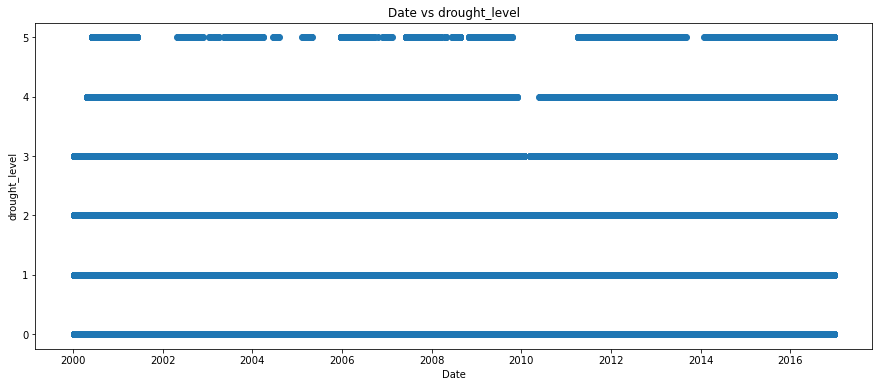

In [12]:
plt.figure(figsize=(15, 6))
plt.scatter(train['date'], train.iloc[:,-1])
plt.title('Date vs ' + train.columns[-1])
plt.xlabel('Date')
plt.ylabel(train.columns[-1])
plt.savefig(plot+'Date vs '+ train.columns[-1])
plt.show();

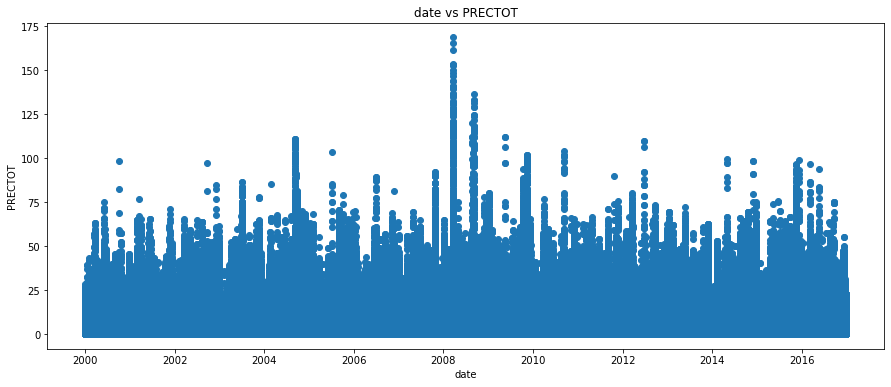

In [25]:
plt.figure(figsize=(15, 6))
plt.scatter(train['date'], train['PRECTOT'])
plt.title(train.columns[0]+ ' vs ' + train.columns[1])
plt.xlabel(train.columns[0])
plt.ylabel(train.columns[1])
plt.savefig(plot+'Date vs '+ train.columns[1])
plt.show();

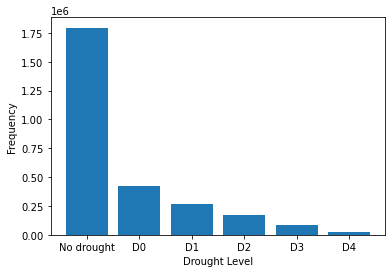

In [13]:
Drought_Level = ['No drought', 'D0', 'D1', 'D2', 'D3', 'D4']
frequency = [np.sum(train['drought_level']==0),
             np.sum(train['drought_level']==1),
             np.sum(train['drought_level']==2),
             np.sum(train['drought_level']==3),
             np.sum(train['drought_level']==4),
             np.sum(train['drought_level']==5)]
plt.bar(Drought_Level, frequency)
plt.xlabel('Drought Level')
plt.ylabel('Frequency')
plt.savefig(plot+'Frequency of Drought Level in Train Data')
plt.show();

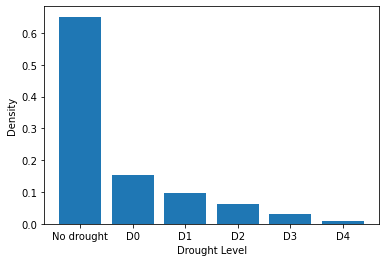

In [14]:
Drought_Level = ['No drought', 'D0', 'D1', 'D2', 'D3', 'D4']
density = [np.sum(train['drought_level']==0)/len(train),
           np.sum(train['drought_level']==1)/len(train),
           np.sum(train['drought_level']==2)/len(train),
           np.sum(train['drought_level']==3)/len(train),
           np.sum(train['drought_level']==4)/len(train),
           np.sum(train['drought_level']==5)/len(train)]

plt.bar(Drought_Level, density)
plt.xlabel('Drought Level')
plt.ylabel('Density')
plt.savefig(plot+'Density of Drought Level in Train Data')
plt.show();

In [15]:
grp=train.groupby('drought_level').mean()

In [16]:
grp

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
drought_level,,,,,,,,,,,,,,,,,,
0.0,3.009059,97.276726,8.073610,12.379055,7.521173,7.549044,17.915287,7.240727,10.674565,12.391479,3.532957,5.125203,1.931468,3.193740,5.529503,7.788781,3.161313,4.627470
1.0,2.312144,96.068507,7.594273,13.081707,6.359986,6.405986,19.292602,7.466758,11.825860,13.192603,3.592160,5.275683,1.903661,3.372038,5.534893,7.865526,3.073666,4.791868
2.0,2.130082,95.445117,7.376545,13.691988,5.921590,5.972783,20.211274,7.828599,12.382696,13.905482,3.677074,5.440702,1.921444,3.519271,5.592612,7.981373,3.077638,4.903732
3.0,1.944860,94.497832,7.254813,14.367129,5.600731,5.656285,21.184735,8.272334,12.912403,14.634344,3.658022,5.426785,1.900274,3.526514,5.553074,7.948272,3.027230,4.921027
4.0,2.053048,94.411205,7.756265,16.198067,6.616086,6.671458,23.159206,10.023955,13.135241,16.538677,3.562286,5.305436,1.842075,3.463310,5.413104,7.806262,2.908735,4.897553
5.0,1.862388,95.748722,8.418987,18.859079,8.229676,8.279077,25.978040,12.635151,13.342910,19.307902,3.478477,5.165962,1.801605,3.364285,5.320927,7.703859,2.841486,4.862394


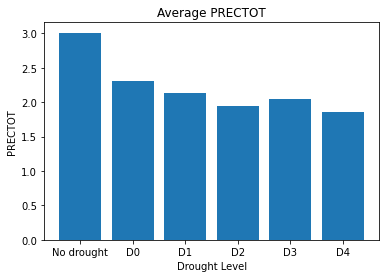

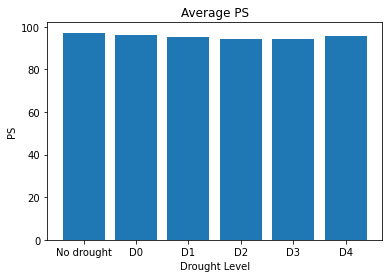

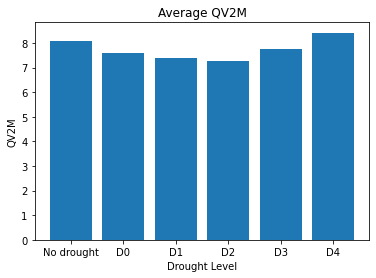

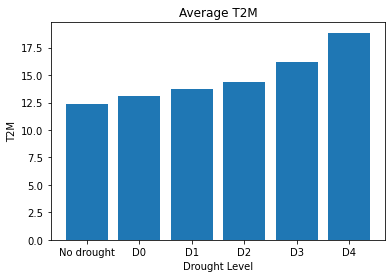

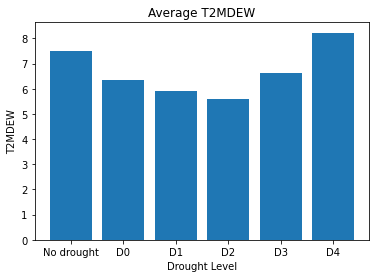

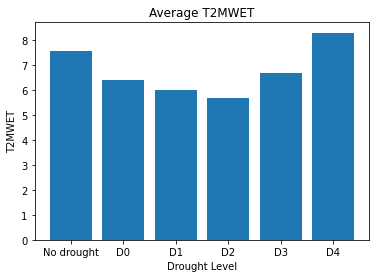

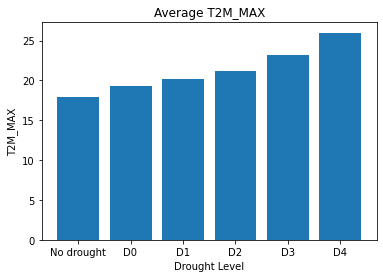

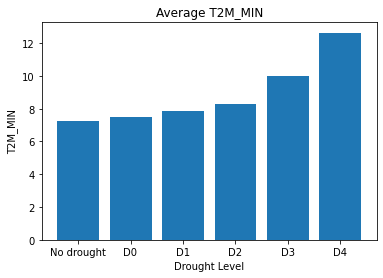

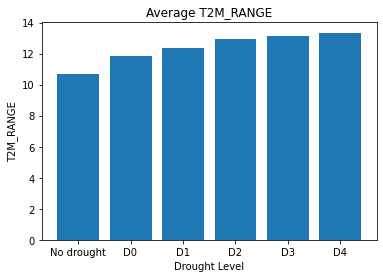

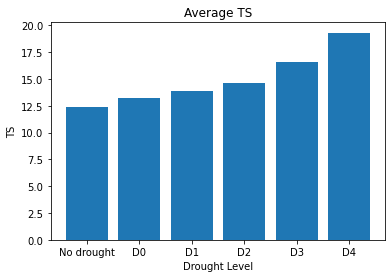

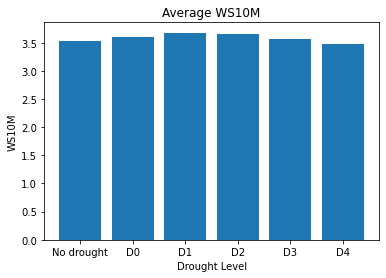

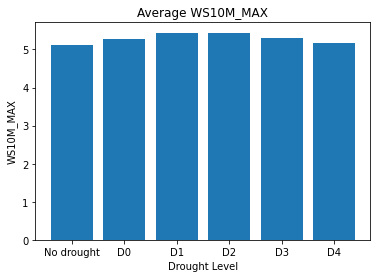

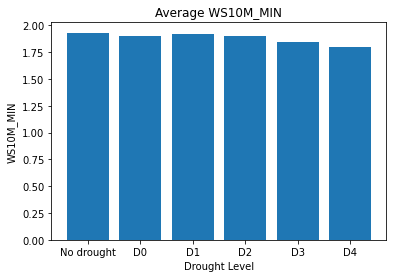

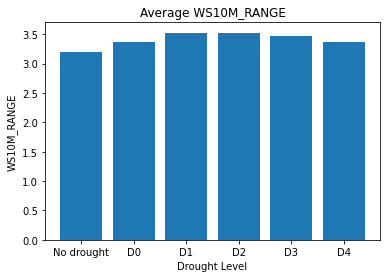

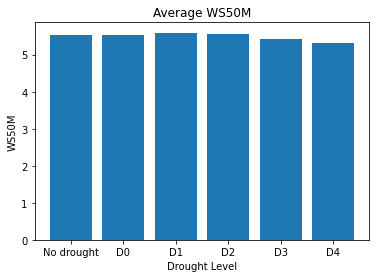

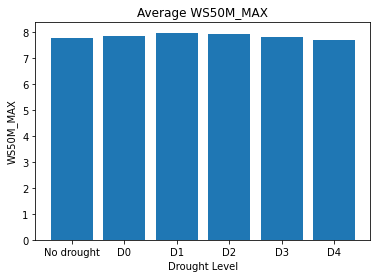

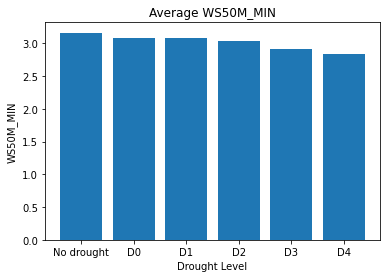

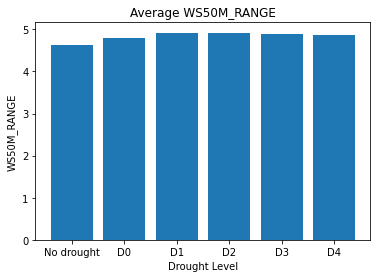

In [17]:
for column in grp.columns:
    plt.bar(Drought_Level,grp[column])
    plt.title('Average '+ column)
    plt.xlabel('Drought Level')
    plt.ylabel(column)
    plt.savefig(plot+'Average '+ column)
    plt.show();

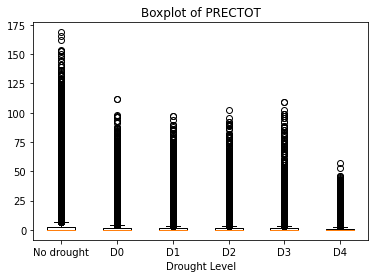

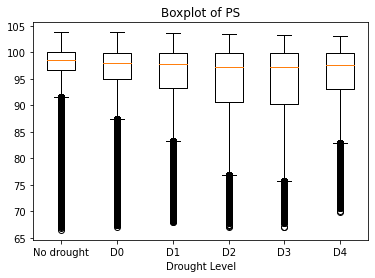

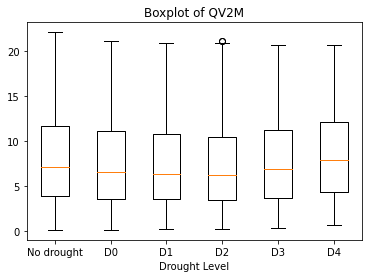

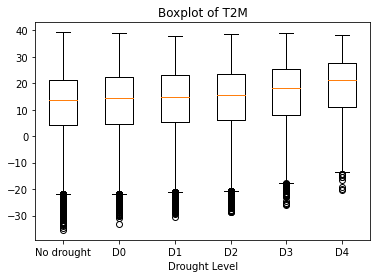

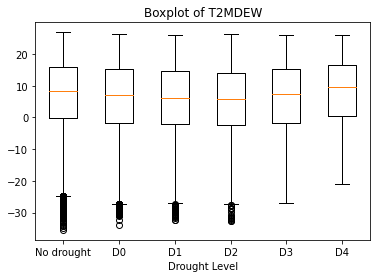

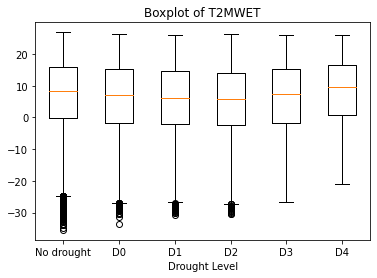

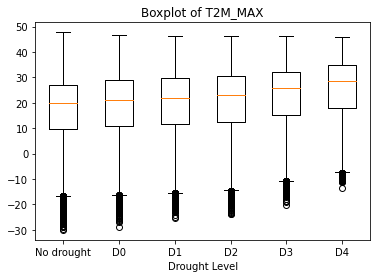

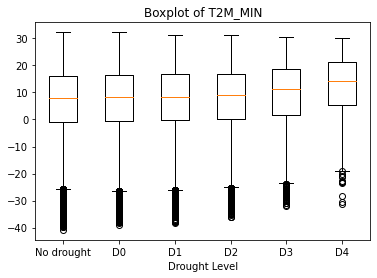

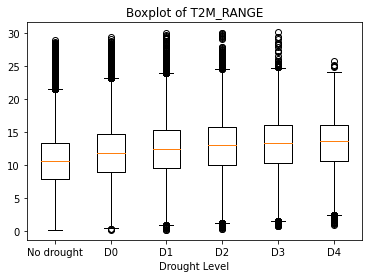

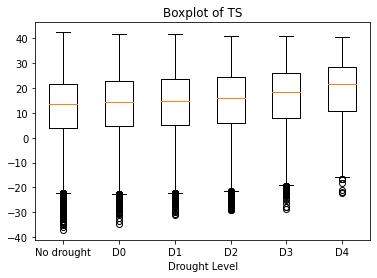

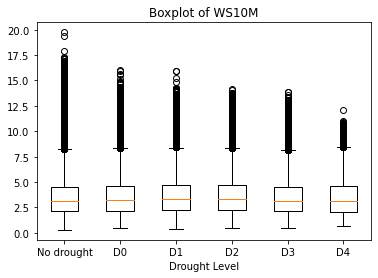

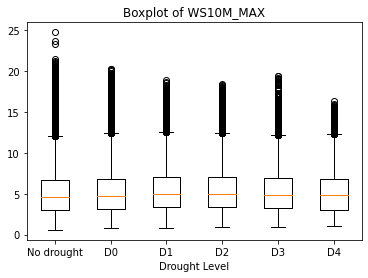

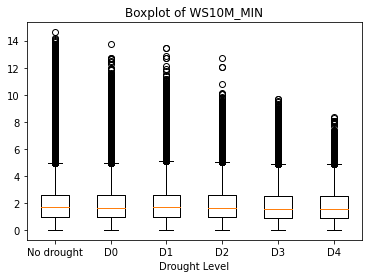

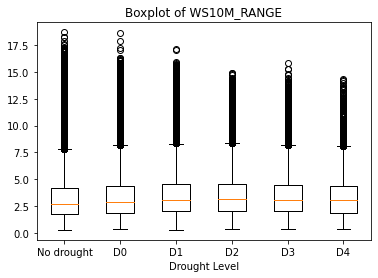

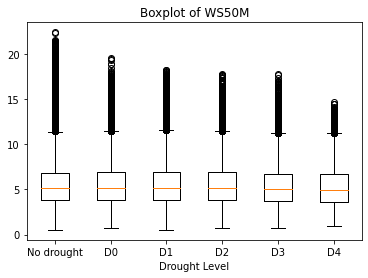

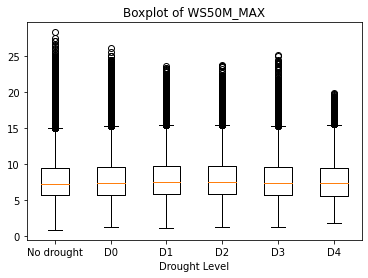

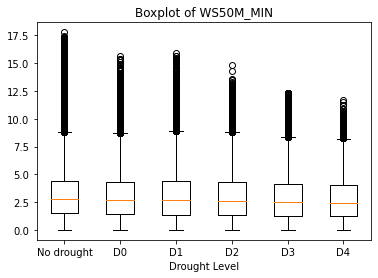

In [18]:
for column in train.columns[1:-2]:
    plt.boxplot([train[train['drought_level']==0][column],
                 train[train['drought_level']==1][column],
                 train[train['drought_level']==2][column],
                 train[train['drought_level']==3][column],
                 train[train['drought_level']==4][column],
                 train[train['drought_level']==5][column]])
    plt.xticks([1,2,3,4,5,6], Drought_Level)
    plt.title('Boxplot of '+ column)
    plt.xlabel('Drought Level')
    plt.savefig(plot+'Box plot of '+column)
    plt.show();

In [10]:
# sns_plot = sns.pairplot(df.loc[:, "date":])
# sns_plot.savefig("pairplot");

### Machine learning

In [11]:
# prepare features(X) and targets(y)
X_train = train.iloc[:,1:-1]
y_train = train.iloc[:,-1]

X_valid = valid.iloc[:,1:-1]
y_valid = valid.iloc[:,-1]

X_test = test.iloc[:,1:-1]
y_test = test.iloc[:,-1]